In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
I1 = plt.imread("Dataset/goldengate/3.png")
I2 = plt.imread("Dataset/goldengate/4.png")

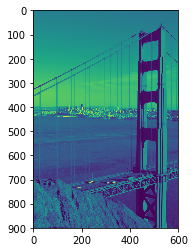

In [15]:
plt.imshow(I1)


In [4]:
from skimage import filters
import cv2

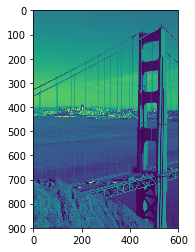

In [52]:
rows,cols = I1.shape
x=1 #Vary from 0 to 1 for translation in both directions by x pixels
matrix_t = np.float32([[1, 0, x], [0, 1, x]])
I3 = cv2.warpAffine(I1, matrix_t, (cols, rows))
plt.imshow(I3)

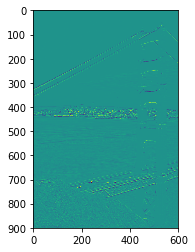

In [53]:
edges_x = filters.sobel_h(I1) 
plt.imshow(edges_x)

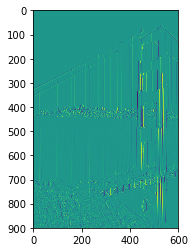

In [54]:
edges_y = filters.sobel_v(I1)
plt.imshow(edges_y)


In [55]:
Mxx = np.sum(edges_x*edges_x)
Myy = np.sum(edges_y*edges_y)
Mxy = np.sum(edges_x*edges_y)
M = np.array([[Mxx,Mxy],[Mxy,Myy]])
M

array([[2310.61258437,  156.87927218],
       [ 156.87927218, 3933.92831543]])

In [56]:
diffI = (I3-I1)
M1 = np.array([np.sum(diffI*edges_x),np.sum(diffI*edges_y)])
M1

array([-1089.96206079, -1942.39493379])

In [57]:
delt = -1*np.matmul(np.linalg.inv(M),np.transpose(M1))

In [58]:
delt*2

array([0.87877221, 0.95246492])

In [59]:
rows,cols = I1.shape
matrix_t = np.float32([[1, 0, delt[0]*2], [0, 1, delt[1]*2]])
translated_img = cv2.warpAffine(I1, matrix_t, (cols, rows))

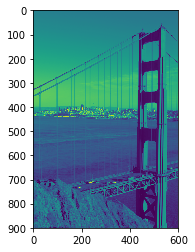

In [60]:
plt.imshow(translated_img)


In [61]:
matrix_t

array([[1.        , 0.        , 0.8787722 ],
       [0.        , 1.        , 0.95246494]], dtype=float32)

[0.9553173  0.84494422]


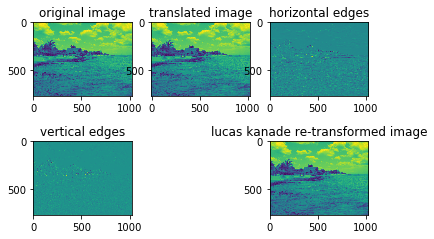

In [75]:
plt.figure()
I1 = plt.imread("Dataset/hotel/1.png")#Change this to obtain results on various images
plt.subplot(2,3,1)
plt.title('original image')
plt.imshow(I1)
rows,cols = I1.shape
x=1 #Vary from 0 to 1 for translation in both directions by x pixels
matrix_t = np.float32([[1, 0, x], [0, 1, x]])
I3 = cv2.warpAffine(I1, matrix_t, (cols, rows))
plt.subplot(2,3,2)
plt.title('translated image')
plt.imshow(I3)
edges_x = filters.sobel_h(I1) 
plt.subplot(2,3,3)
plt.title('horizontal edges')
plt.imshow(edges_x)
edges_y = filters.sobel_v(I1)
plt.subplot(2,3,4)
plt.title('vertical edges')
plt.imshow(edges_y)
Mxx = np.sum(edges_x*edges_x)
Myy = np.sum(edges_y*edges_y)
Mxy = np.sum(edges_x*edges_y)
M = np.array([[Mxx,Mxy],[Mxy,Myy]])
diffI = (I3-I1)
M1 = np.array([np.sum(diffI*edges_x),np.sum(diffI*edges_y)])
delt = -1*np.matmul(np.linalg.inv(M),np.transpose(M1))
print(delt*2)
rows,cols = I1.shape
matrix_t = np.float32([[1, 0, delt[0]*2], [0, 1, delt[1]*2]])
translated_img = cv2.warpAffine(I1, matrix_t, (cols, rows))
plt.subplot(2,3,6)
plt.title('lucas kanade re-transformed image')
plt.imshow(translated_img)
